From [SciPy.org](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.interpolate.RectSphereBivariateSpline.html)

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
lats = np.linspace(10, 170, 9) * np.pi / 180.
lons = np.linspace(0, 350, 18) * np.pi / 180.
data = np.dot(np.atleast_2d(90. - np.linspace(-80., 80., 18)).T,
                  np.atleast_2d(180. - np.abs(np.linspace(0., 350., 9)))).T

In [45]:
new_lats = np.linspace(1, 180, 180) * np.pi / 180
new_lons = np.linspace(1, 360, 360) * np.pi / 180
new_lats, new_lons = np.meshgrid(new_lats, new_lons)

In [46]:
from scipy.interpolate import RectSphereBivariateSpline
lut = RectSphereBivariateSpline(lats, lons, data)

In [47]:
data_interp = lut.ev(new_lats.ravel(),
                      new_lons.ravel()).reshape((360, 180)).T

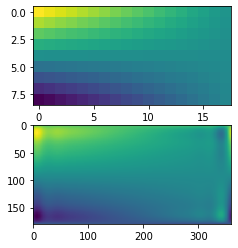

In [48]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.imshow(data, interpolation='nearest')
ax2 = fig.add_subplot(212)
ax2.imshow(data_interp, interpolation='nearest')
plt.show()

Chosing the optimal value of s can be a delicate task. Recommended values for s depend on the accuracy of the data values. If the user has an idea of the statistical errors on the data, she can also find a proper estimate for s. By assuming that, if she specifies the right s, the interpolator will use a spline f(u,v) which exactly reproduces the function underlying the data, she can evaluate sum((r(i,j)-s(u(i),v(j)))^2) to find a good estimate for this s. For example, if she knows that the statistical errors on her r(i,j)-values are not greater than 0.1, she may expect that a good s should have a value not larger than u.size * v.size * (0.1)^2.

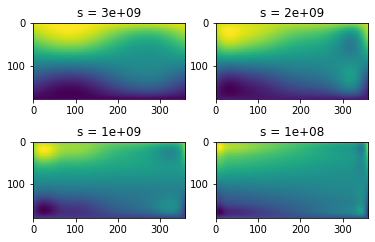

In [51]:
fig2 = plt.figure()
s = [3e9, 2e9, 1e9, 1e8]
for ii in range(len(s)):
    lut = RectSphereBivariateSpline(lats, lons, data, s=s[ii])
    data_interp = lut.ev(new_lats.ravel(), new_lons.ravel()).reshape((360, 180)).T
    ax = fig2.add_subplot(2, 2, ii+1)
    ax.imshow(data_interp, interpolation='nearest')
    ax.set_title("s = %g" % s[ii])
plt.show()